<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/REDES_NEURONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 RED NEURONAL DESDE CERO - MNIST
📥 Descargando y preparando datos MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shapes originales:
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)
Tipo de datos: uint8
Rango original: 0 - 255

Después del aplanamiento:
X_train: (60000, 784)
X_test: (10000, 784)
Después de normalización:
X_train max: 1.0
X_train min: 0.0

One-Hot Encoding:
y_train shape: (60000,) -> (60000, 10)
y_train dtype: float64

División final de datos:
Entrenamiento: (48000, 784)
Validación: (12000, 784)
Prueba: (10000, 784)

🖼️ Visualización de ejemplo:


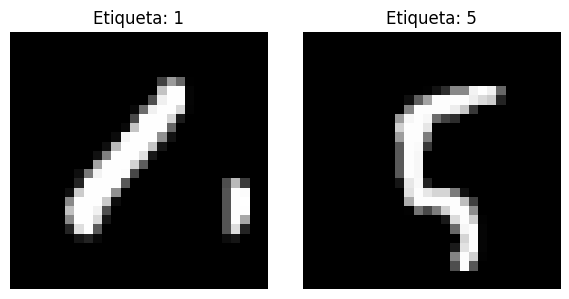


📦 Mini-batch setup:
Número total de mini-batches: 2400

🎓 [PROBLEMA 6] ENTRENAMIENTO Y EVALUACIÓN
⚙️ Pesos inicializados:
   W1: (784, 400), B1: (400,)
   W2: (400, 200), B2: (200,)
   W3: (200, 10), B3: (10,)

🚀 Iniciando entrenamiento...
   Épocas: 100
   Batch size: 20
   Learning rate: 0.01
   Datos de entrenamiento: (48000, 784)
   Datos de validación: (12000, 784)
   Época  20/100: Train Loss = 0.529586, Val Loss = 0.515897
   Época  40/100: Train Loss = 0.304495, Val Loss = 0.313176
   Época  60/100: Train Loss = 0.214097, Val Loss = 0.229109
   Época  80/100: Train Loss = 0.153715, Val Loss = 0.176408
   Época 100/100: Train Loss = 0.118515, Val Loss = 0.147857
✅ Entrenamiento completado!

📊 Evaluación en conjunto de validación:
Precisión en validación: 0.9560 (95.60%)

📊 Evaluación en conjunto de prueba:
Precisión en prueba: 0.9585 (95.85%)

📈 [PROBLEMA 7] CURVAS DE APRENDIZAJE


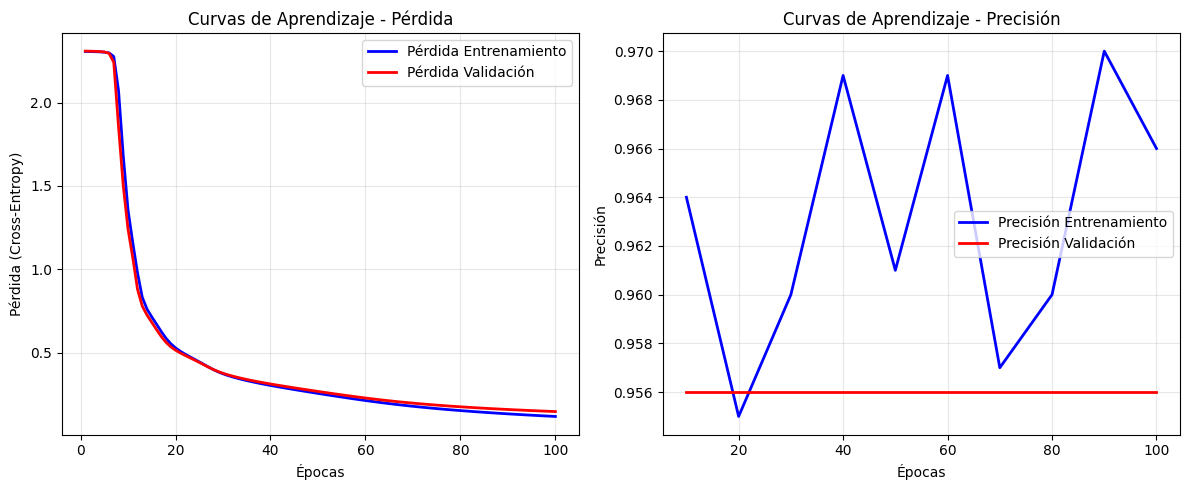


🔍 [PROBLEMA 8] VERIFICACIÓN DE CLASIFICACIÓN ERRÓNEA
Total de clasificaciones erróneas: 528
Mostrando: 36 ejemplos


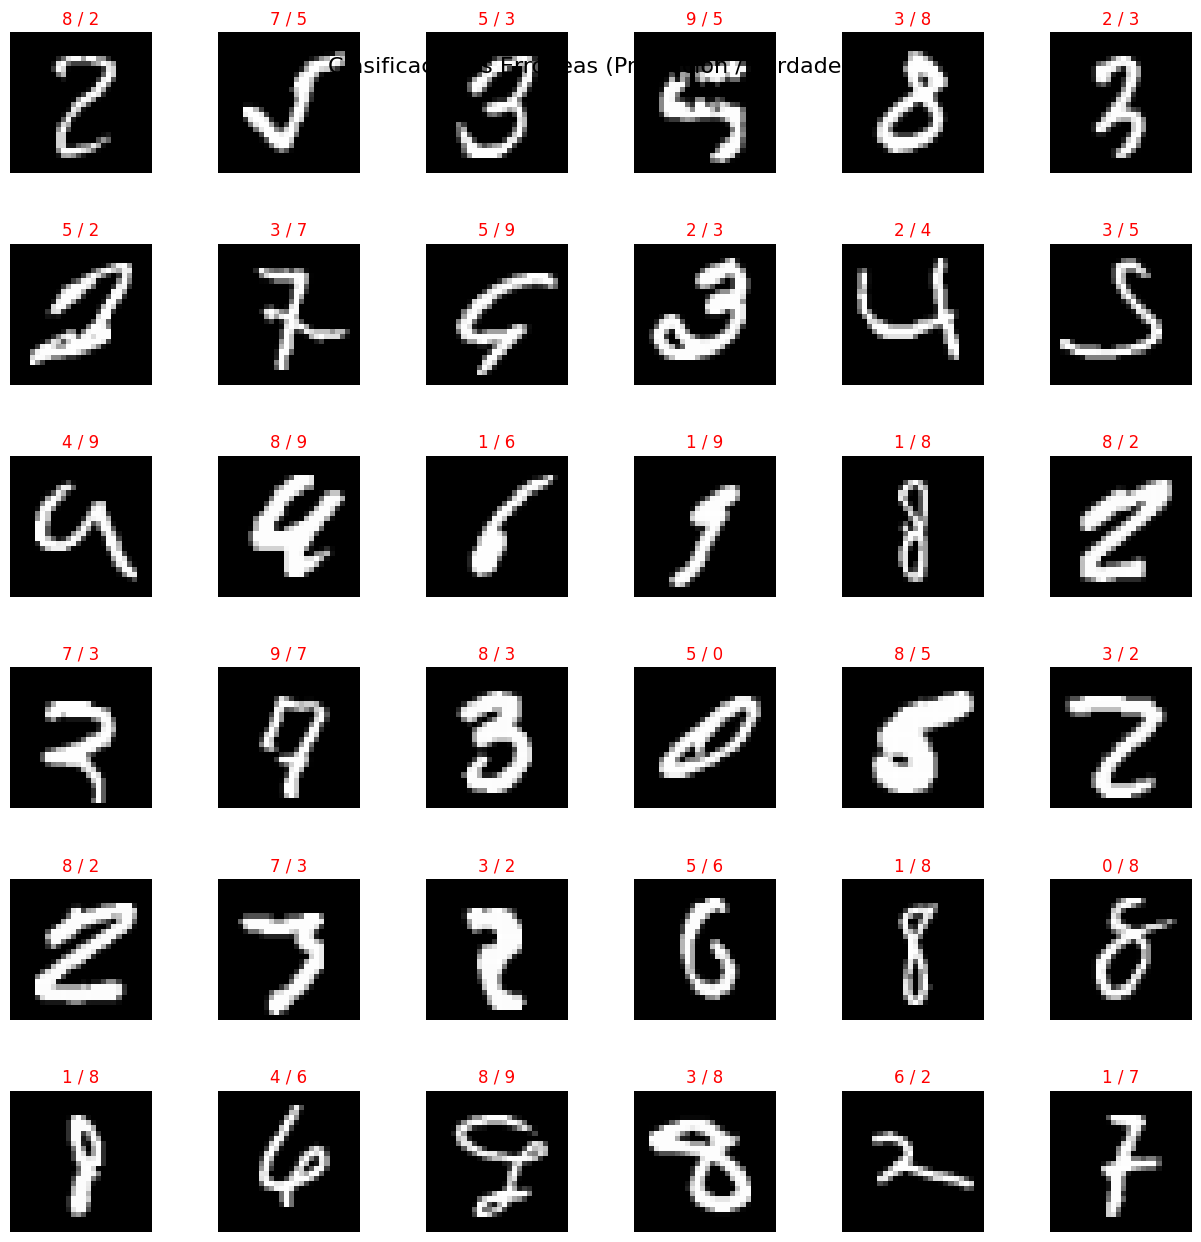


📋 ANÁLISIS ADICIONAL DE RESULTADOS
Distribución de predicciones en validación:

Clase | Predicho | Verdadero
------------------------------
  0   |   1207   |   1185
  1   |   1366   |   1348
  2   |   1195   |   1192
  3   |   1156   |   1226
  4   |   1167   |   1168
  5   |   1107   |   1084
  6   |   1192   |   1184
  7   |   1225   |   1253
  8   |   1182   |   1170
  9   |   1203   |   1190

Precisión por clase:
Clase | Precisión
--------------------
  0   |   0.9899
  1   |   0.9755
  2   |   0.9555
  3   |   0.9168
  4   |   0.9546
  5   |   0.9594
  6   |   0.9696
  7   |   0.9537
  8   |   0.9419
  9   |   0.9420

🎯 ESTADÍSTICAS FINALES:
   • Datos procesados: 48,000 entrenamiento, 12,000 validación, 10,000 prueba
   • Arquitectura: 784 → 400 → 200 → 10
   • Función activación: Sigmoide (capas ocultas), Softmax (salida)
   • Épocas entrenadas: 100
   • Precisión final validación: 0.9560 (95.60%)
   • Precisión final prueba: 0.9585 (95.85%)
   • Pérdida final entrenamiento: 0

In [ ]:
"""
===============================================================================
RED NEURONAL DESDE CERO - IMPLEMENTACIÓN COMPLETA PARA MNIST
Implementación de todos los problemas del Sprint (Problema 1-8)
===============================================================================
"""

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

print("🧠 RED NEURONAL DESDE CERO - MNIST")
print("=" * 50)

# ===============================================================================
# DESCARGA Y PREPROCESAMIENTO COMPLETO DE MNIST
# ===============================================================================

print("📥 Descargando y preparando datos MNIST...")

# Descargar dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Shapes originales:")
print(f"X_train: {X_train.shape}")  # (60000, 28, 28)
print(f"X_test: {X_test.shape}")    # (10000, 28, 28)
print(f"y_train: {y_train.shape}")  # (60000,)
print(f"y_test: {y_test.shape}")    # (10000,)
print(f"Tipo de datos: {X_train[0].dtype}")  # uint8

# Verificar datos originales
print(f"Rango original: {X_train.min()} - {X_train.max()}")

# APLANAMIENTO: (60000, 28, 28) -> (60000, 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(f"\nDespués del aplanamiento:")
print(f"X_train: {X_train.shape}")  # (60000, 784)
print(f"X_test: {X_test.shape}")    # (10000, 784)

# NORMALIZACIÓN: uint8 [0,255] -> float [0,1]
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255.0
X_test /= 255.0

print(f"Después de normalización:")
print(f"X_train max: {X_train.max()}")  # 1.0
print(f"X_train min: {X_train.min()}")  # 0.0

# ONE-HOT ENCODING para las etiquetas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

print(f"\nOne-Hot Encoding:")
print(f"y_train shape: {y_train.shape} -> {y_train_one_hot.shape}")  # (60000,) -> (60000, 10)
print(f"y_train dtype: {y_train_one_hot.dtype}")  # float64

# DIVISIÓN TRAIN/VAL: 80% train, 20% val de los datos de entrenamiento
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nDivisión final de datos:")
print(f"Entrenamiento: {X_train_split.shape}")  # (48000, 784)
print(f"Validación: {X_val.shape}")             # (12000, 784)
print(f"Prueba: {X_test.shape}")                # (10000, 784)

# Visualización de ejemplo
print(f"\n🖼️ Visualización de ejemplo:")
index = 0
image = X_train_split[index].reshape(28, 28)
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Etiqueta: {np.argmax(y_train_split[index])}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_train[100].reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta: {y_train[100]}')
plt.axis('off')

plt.tight_layout()
plt.show()

# ===============================================================================
# CLASE GETMINIBATCH (tal como se proporciona en el enunciado)
# ===============================================================================

class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# Test del iterador
get_mini_batch = GetMiniBatch(X_train_split, y_train_split, batch_size=20)
print(f"\n📦 Mini-batch setup:")
print(f"Número total de mini-batches: {len(get_mini_batch)}")  # 2400

# ===============================================================================
# IMPLEMENTACIÓN DE LA RED NEURONAL DESDE CERO
# ===============================================================================

class ScratchSimpleNeuralNetworkClassifier:
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------
    n_nodes1 : int
        Primera capa oculta - número de nodos
    n_nodes2 : int
        Segunda capa oculta - número de nodos
    n_output : int
        Capa de salida - número de clases
    sigma : float
        Desviación estándar para inicialización de pesos
    learning_rate : float
        Tasa de aprendizaje
    verbose : bool
        Mostrar progreso durante entrenamiento
    """

    def __init__(self, n_nodes1=400, n_nodes2=200, n_output=10,
                 sigma=0.01, learning_rate=0.01, verbose=True):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.verbose = verbose

        # Para guardar el historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []

    def _initialize_weights(self, n_features):
        """
        [Problema 1] Inicialización de pesos con distribución gaussiana
        """
        # Pesos de la primera capa: (n_features, n_nodes1)
        self.W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)
        self.B1 = self.sigma * np.random.randn(self.n_nodes1)

        # Pesos de la segunda capa: (n_nodes1, n_nodes2)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 = self.sigma * np.random.randn(self.n_nodes2)

        # Pesos de la tercera capa: (n_nodes2, n_output)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B3 = self.sigma * np.random.randn(self.n_output)

        if self.verbose:
            print(f"⚙️ Pesos inicializados:")
            print(f"   W1: {self.W1.shape}, B1: {self.B1.shape}")
            print(f"   W2: {self.W2.shape}, B2: {self.B2.shape}")
            print(f"   W3: {self.W3.shape}, B3: {self.B3.shape}")

    def _sigmoid(self, x):
        """
        Función de activación Sigmoide
        f(x) = 1 / (1 + exp(-x))
        """
        # Clip para evitar overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """
        Derivada de la función Sigmoide
        f'(x) = f(x) * (1 - f(x))
        """
        sig = self._sigmoid(x)
        return sig * (1 - sig)

    def _softmax(self, x):
        """
        Función Softmax para la capa de salida
        """
        # Restar el máximo para estabilidad numérica
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _forward_propagation(self, X):
        """
        [Problema 2] Propagación hacia adelante

        Arquitectura de 3 capas:
        X -> [Linear + Sigmoid] -> [Linear + Sigmoid] -> [Linear + Softmax] -> Output
        """
        batch_size = X.shape[0]

        # Primera capa: A1 = X·W1 + B1, Z1 = sigmoid(A1)
        self.A1 = X @ self.W1 + self.B1  # (batch_size, n_nodes1)
        self.Z1 = self._sigmoid(self.A1)  # (batch_size, n_nodes1)

        # Segunda capa: A2 = Z1·W2 + B2, Z2 = sigmoid(A2)
        self.A2 = self.Z1 @ self.W2 + self.B2  # (batch_size, n_nodes2)
        self.Z2 = self._sigmoid(self.A2)  # (batch_size, n_nodes2)

        # Tercera capa (salida): A3 = Z2·W3 + B3, Z3 = softmax(A3)
        self.A3 = self.Z2 @ self.W3 + self.B3  # (batch_size, n_output)
        self.Z3 = self._softmax(self.A3)  # (batch_size, n_output)

        return self.Z3

    def _cross_entropy_loss(self, y_true, y_pred):
        """
        [Problema 3] Error de entropía cruzada

        L = -1/n_b * Σ Σ y_ij * log(z3_ij)
        """
        batch_size = y_true.shape[0]

        # Clip para evitar log(0)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calcular pérdida
        loss = -np.sum(y_true * np.log(y_pred)) / batch_size

        return loss

    def _backward_propagation(self, X, y_true):
        """
        [Problema 4] Retropropagación con función Sigmoide

        Implementa las fórmulas exactas de retropropagación:
        - Tercera capa: ∂L/∂A3 = 1/n_b * (Z3 - Y)
        - Segunda capa: ∂L/∂A2 = ∂L/∂Z2 ⊙ {sigmoid(A2) * (1 - sigmoid(A2))}
        - Primera capa: ∂L/∂A1 = ∂L/∂Z1 ⊙ {sigmoid(A1) * (1 - sigmoid(A1))}
        """
        batch_size = X.shape[0]

        # --- TERCERA CAPA (SALIDA) ---
        # ∂L/∂A3 = 1/n_b * (Z3 - Y)
        dL_dA3 = (self.Z3 - y_true) / batch_size  # (batch_size, n_output)

        # ∂L/∂B3 = Σ ∂L/∂A3_i (suma sobre el batch)
        dL_dB3 = np.sum(dL_dA3, axis=0)  # (n_output,)

        # ∂L/∂W3 = Z2^T · ∂L/∂A3
        dL_dW3 = self.Z2.T @ dL_dA3  # (n_nodes2, n_output)

        # ∂L/∂Z2 = ∂L/∂A3 · W3^T
        dL_dZ2 = dL_dA3 @ self.W3.T  # (batch_size, n_nodes2)

        # --- SEGUNDA CAPA ---
        # ∂L/∂A2 = ∂L/∂Z2 ⊙ {sigmoid(A2) * (1 - sigmoid(A2))}
        sigmoid_derivative_A2 = self._sigmoid_derivative(self.A2)
        dL_dA2 = dL_dZ2 * sigmoid_derivative_A2  # (batch_size, n_nodes2)

        # ∂L/∂B2 = Σ ∂L/∂A2_i (suma sobre el batch)
        dL_dB2 = np.sum(dL_dA2, axis=0)  # (n_nodes2,)

        # ∂L/∂W2 = Z1^T · ∂L/∂A2
        dL_dW2 = self.Z1.T @ dL_dA2  # (n_nodes1, n_nodes2)

        # ∂L/∂Z1 = ∂L/∂A2 · W2^T
        dL_dZ1 = dL_dA2 @ self.W2.T  # (batch_size, n_nodes1)

        # --- PRIMERA CAPA ---
        # ∂L/∂A1 = ∂L/∂Z1 ⊙ {sigmoid(A1) * (1 - sigmoid(A1))}
        sigmoid_derivative_A1 = self._sigmoid_derivative(self.A1)
        dL_dA1 = dL_dZ1 * sigmoid_derivative_A1  # (batch_size, n_nodes1)

        # ∂L/∂B1 = Σ ∂L/∂A1_i (suma sobre el batch)
        dL_dB1 = np.sum(dL_dA1, axis=0)  # (n_nodes1,)

        # ∂L/∂W1 = X^T · ∂L/∂A1
        dL_dW1 = X.T @ dL_dA1  # (n_features, n_nodes1)

        # Actualizar pesos usando descenso de gradiente
        # W' = W - α * ∂L/∂W, B' = B - α * ∂L/∂B
        self.W3 -= self.learning_rate * dL_dW3
        self.B3 -= self.learning_rate * dL_dB3
        self.W2 -= self.learning_rate * dL_dW2
        self.B2 -= self.learning_rate * dL_dB2
        self.W1 -= self.learning_rate * dL_dW1
        self.B1 -= self.learning_rate * dL_dB1

    def fit(self, X, y, X_val=None, y_val=None, epochs=100, batch_size=20):
        """
        [Problema 6] Entrenamiento de la red neuronal
        """
        # Inicializar pesos
        n_features = X.shape[1]
        self._initialize_weights(n_features)

        if self.verbose:
            print(f"\n🚀 Iniciando entrenamiento...")
            print(f"   Épocas: {epochs}")
            print(f"   Batch size: {batch_size}")
            print(f"   Learning rate: {self.learning_rate}")
            print(f"   Datos de entrenamiento: {X.shape}")
            if X_val is not None:
                print(f"   Datos de validación: {X_val.shape}")

        # Crear iterador de mini-batches
        get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)
        n_batches = len(get_mini_batch)

        # Bucle de entrenamiento
        for epoch in range(epochs):
            epoch_loss = 0.0

            # Procesar todos los mini-batches
            for mini_X, mini_y in get_mini_batch:
                # Forward pass
                predictions = self._forward_propagation(mini_X)

                # Calcular pérdida
                loss = self._cross_entropy_loss(mini_y, predictions)
                epoch_loss += loss

                # Backward pass
                self._backward_propagation(mini_X, mini_y)

            # Pérdida promedio de la época
            avg_train_loss = epoch_loss / n_batches
            self.train_loss_history.append(avg_train_loss)

            # Evaluación en validación
            val_loss = None
            if X_val is not None and y_val is not None:
                val_predictions = self._forward_propagation(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                self.val_loss_history.append(val_loss)

            # Mostrar progreso
            if self.verbose and (epoch + 1) % 20 == 0:
                if val_loss is not None:
                    print(f"   Época {epoch+1:3d}/{epochs}: "
                          f"Train Loss = {avg_train_loss:.6f}, "
                          f"Val Loss = {val_loss:.6f}")
                else:
                    print(f"   Época {epoch+1:3d}/{epochs}: "
                          f"Train Loss = {avg_train_loss:.6f}")

        if self.verbose:
            print("✅ Entrenamiento completado!")

    def predict(self, X):
        """
        [Problema 5] Estimación/Predicción

        Determinar cuál de las 10 probabilidades es la más alta usando argmax
        """
        # Forward pass para obtener probabilidades
        probabilities = self._forward_propagation(X)

        # Obtener la clase con mayor probabilidad
        predictions = np.argmax(probabilities, axis=1)

        return predictions

    def predict_proba(self, X):
        """
        Obtener las probabilidades de cada clase
        """
        return self._forward_propagation(X)

# ===============================================================================
# [PROBLEMA 6] ENTRENAMIENTO Y EVALUACIÓN
# ===============================================================================

print(f"\n🎓 [PROBLEMA 6] ENTRENAMIENTO Y EVALUACIÓN")
print("=" * 50)

# Crear el modelo
model = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=400,
    n_nodes2=200,
    n_output=10,
    sigma=0.01,
    learning_rate=0.01,
    verbose=True
)

# Entrenar el modelo
model.fit(
    X_train_split, y_train_split,
    X_val, y_val,
    epochs=100,
    batch_size=20
)

# Evaluación en conjunto de validación
print(f"\n📊 Evaluación en conjunto de validación:")
val_predictions = model.predict(X_val)
val_true_labels = np.argmax(y_val, axis=1)
val_accuracy = np.mean(val_predictions == val_true_labels)

print(f"Precisión en validación: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# Evaluación en conjunto de prueba
print(f"\n📊 Evaluación en conjunto de prueba:")
test_predictions = model.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Precisión en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ===============================================================================
# [PROBLEMA 7] CURVAS DE APRENDIZAJE
# ===============================================================================

print(f"\n📈 [PROBLEMA 7] CURVAS DE APRENDIZAJE")
print("=" * 50)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Pérdida de entrenamiento vs validación
plt.subplot(1, 2, 1)
epochs_range = range(1, len(model.train_loss_history) + 1)
plt.plot(epochs_range, model.train_loss_history, 'b-', label='Pérdida Entrenamiento', linewidth=2)
plt.plot(epochs_range, model.val_loss_history, 'r-', label='Pérdida Validación', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Cross-Entropy)')
plt.title('Curvas de Aprendizaje - Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# Precisión durante el entrenamiento (calculada cada 10 épocas para eficiencia)
plt.subplot(1, 2, 2)
# Calcular precisión en algunos puntos del entrenamiento
accuracy_epochs = []
train_accuracies = []
val_accuracies = []

for epoch in range(9, len(model.train_loss_history), 10):
    # Evaluar en una muestra pequeña para eficiencia
    sample_indices = np.random.choice(len(X_train_split), 1000, replace=False)
    X_sample = X_train_split[sample_indices]
    y_sample_true = np.argmax(y_train_split[sample_indices], axis=1)

    # Predicciones en muestra de entrenamiento
    sample_predictions = model.predict(X_sample)
    train_acc = np.mean(sample_predictions == y_sample_true)

    # Predicciones en validación
    val_pred = model.predict(X_val)
    val_acc = np.mean(val_pred == val_true_labels)

    accuracy_epochs.append(epoch + 1)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

plt.plot(accuracy_epochs, train_accuracies, 'b-', label='Precisión Entrenamiento', linewidth=2)
plt.plot(accuracy_epochs, val_accuracies, 'r-', label='Precisión Validación', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje - Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===============================================================================
# [PROBLEMA 8] VERIFICACIÓN DE CLASIFICACIÓN ERRÓNEA
# ===============================================================================

print(f"\n🔍 [PROBLEMA 8] VERIFICACIÓN DE CLASIFICACIÓN ERRÓNEA")
print("=" * 50)

# Función de visualización tal como se proporciona en el enunciado
def visualize_misclassified(y_pred, y_val, X_val, num=36):
    """
    誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

    Parameters:
    ----------
    y_pred : 推定値のndarray (n_samples,)
    y_val : 検証データの正解ラベル(n_samples,)
    X_val : 検証データの特徴量（n_samples, n_features)
    """

    true_false = y_pred == y_val
    false_list = np.where(true_false == False)[0].astype(int)

    if false_list.shape[0] < num:
        num = false_list.shape[0]

    print(f"Total de clasificaciones erróneas: {false_list.shape[0]}")
    print(f"Mostrando: {num} ejemplos")

    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.3)

    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]], y_val[false_list[i]]),
                    fontsize=12, color='red')
        ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
        ax.axis('off')

    plt.suptitle('Clasificaciones Erróneas (Predicción / Verdadero)', fontsize=16)
    plt.show()

# Obtener predicciones para visualización
val_predictions_viz = model.predict(X_val)
val_true_labels_viz = np.argmax(y_val, axis=1)

# Visualizar clasificaciones erróneas
visualize_misclassified(val_predictions_viz, val_true_labels_viz, X_val, num=36)

# ===============================================================================
# ANÁLISIS ADICIONAL DE RESULTADOS
# ===============================================================================

print(f"\n📋 ANÁLISIS ADICIONAL DE RESULTADOS")
print("=" * 50)

# Matriz de confusión simple
from collections import Counter

print("Distribución de predicciones en validación:")
pred_distribution = Counter(val_predictions_viz)
true_distribution = Counter(val_true_labels_viz)

print("\nClase | Predicho | Verdadero")
print("-" * 30)
for i in range(10):
    print(f"  {i}   |   {pred_distribution[i]:4d}   |   {true_distribution[i]:4d}")

# Precisión por clase
print(f"\nPrecisión por clase:")
print("Clase | Precisión")
print("-" * 20)
for i in range(10):
    mask = val_true_labels_viz == i
    if mask.sum() > 0:
        class_accuracy = np.mean(val_predictions_viz[mask] == val_true_labels_viz[mask])
        print(f"  {i}   |   {class_accuracy:.4f}")

# Estadísticas finales
print(f"\n🎯 ESTADÍSTICAS FINALES:")
print(f"   • Datos procesados: {X_train_split.shape[0]:,} entrenamiento, {X_val.shape[0]:,} validación, {X_test.shape[0]:,} prueba")
print(f"   • Arquitectura: 784 → {model.n_nodes1} → {model.n_nodes2} → {model.n_output}")
print(f"   • Función activación: Sigmoide (capas ocultas), Softmax (salida)")
print(f"   • Épocas entrenadas: {len(model.train_loss_history)}")
print(f"   • Precisión final validación: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   • Precisión final prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Pérdida final entrenamiento: {model.train_loss_history[-1]:.6f}")
print(f"   • Pérdida final validación: {model.val_loss_history[-1]:.6f}")

print(f"\n✅ ¡TODOS LOS PROBLEMAS (1-8) COMPLETADOS CON ÉXITO!")